# 𓀀 𓀁 𓀂 𓀃 𓀄 𓀅 𓀆 𓀇 𓀈 𓀉 𓀊 𓀋 𓀌 𓀍 𓀎 𓀏 𓀐 𓀑 𓀒 𓀓 𓀔 𓀕 𓀖 𓀗 𓀘 𓀙 𓀚 𓀛 𓀜 𓀝

# TDT4173 - Machine Learning Group - Project
This is an explanatory Jupyter Notebook that is intended to show how the Project Group approached the "Solar Energy Production Forecasting" challenge. 

# Exploratory Data Analysis 🪭🪭🪭

We have used Python 3.10.12 for this project. Newer versions of Python does not work. 

The following libraries are required to run the code successfully:

*List*

It is also made aditional .py files holding different help functions. These are:
"`data_processing.py`", "`feature_generation.py`", `feature_selection.py`", "`model_evaluation.py`", "`data_pipeline.py`"

The machine learning modes that is testet are:
* `XGBoost`
* `Catboost`

Parts:
1. Libary import
2. Data extraction
3. Signal analysis
4. Feature analysis with correlation
5. Feature analysis with (...) K-means elns.
6. Feature analysis with XGBoost
7. Feature analysis with Catboost


__Witch scripts that is included__

* `feature_extraction.py`
* `data_processing.py`

# 𓀀 𓀁 𓀂 𓀃 𓀄 𓀅 𓀆 𓀇 𓀈 𓀉 𓀊 𓀋 𓀌 𓀍 𓀎 𓀏 𓀐 𓀑 𓀒 𓀓 𓀔 𓀕 𓀖 𓀗 𓀘 𓀙 𓀚 𓀛 𓀜 𓀝

## Libary import


In [72]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pylab as plt
import data_processing as dat_proc

%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest

## Extractiong the data

In [73]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')



## Signal Analysis 🪺

Firsty the provided datasets are differend lengt, and closer inspection revile that they don't share all the time stamps. 
It's easy to se for set C that the label data training_c is not the same length as the signal data signal_c.

This is fixed with the function __`data_length_matching`__ by removing the time stamps that are not shared between the two datasets.

In [74]:
def data_length_matching(train: pd.DataFrame, obs: pd.DataFrame)-> tuple[pd.DataFrame, pd.DataFrame]:
    """
    This function is intended to ensure that both the training data and
    the observed data are sorted, and contain the same number of entries. 
    """

    # Cut the data frames so that their date match.
    obs_feature_test = obs[obs['date_forecast'].isin(train['time'])].sort_values(by=['date_forecast'])  # sortert etter datao
    # If only one of them has the date ensure that the other also has the same sorting.
    train_feature_test = train[train['time'].isin(obs['date_forecast'])].sort_values(by=['time'])       # sortert etter datao

    return train_feature_test, obs_feature_test

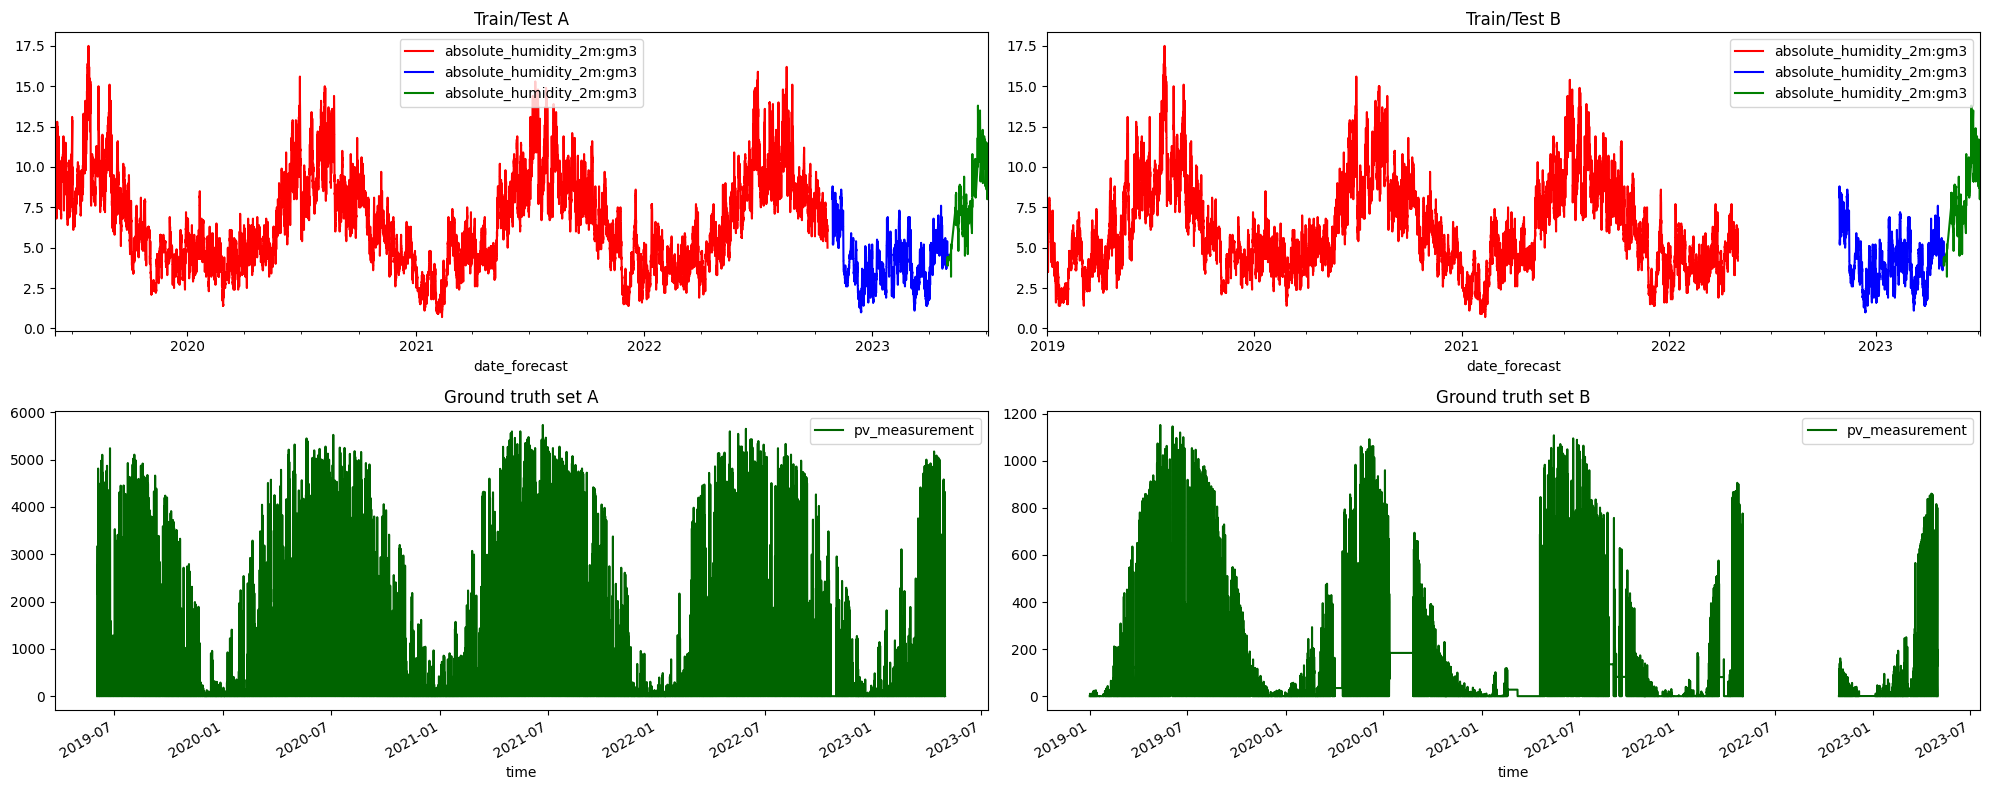

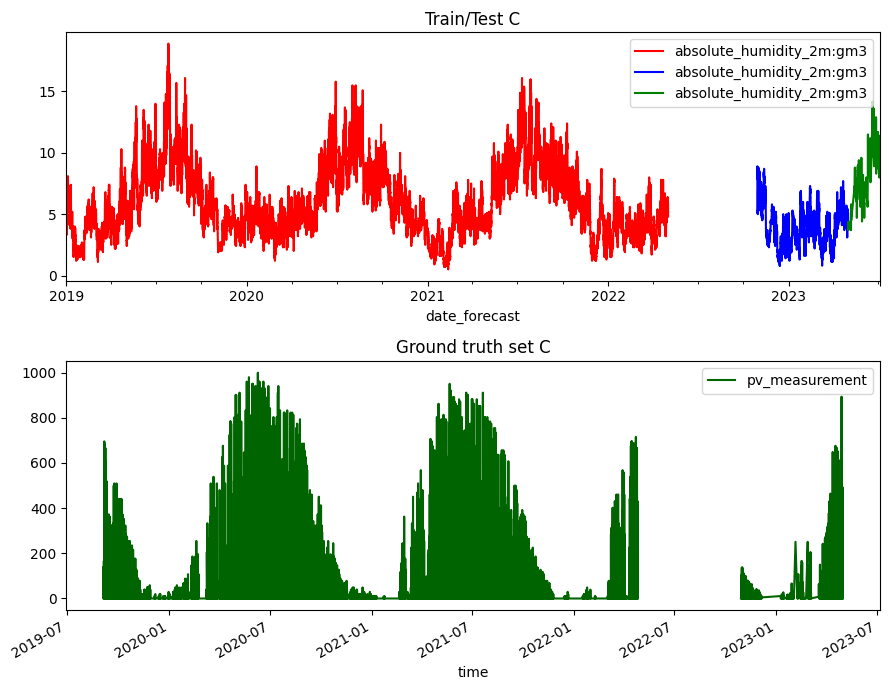

In [75]:
# Set display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Set plot options
plt.rcParams['figure.figsize'] = [20, 8]  
fig, axs = plt.subplots(2, 2)  # Adjust height ratios

# Plotting a single feature for all the sets to understand the data better
feature_name = 'absolute_humidity_2m:gm3'

# Plotting Train/Test & Ground Truth for set A
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0,0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0,0], color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0,0], color='green')
train_a[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1,0], title='Ground truth set A', color='darkgreen')

# Plotting Train/Test & Ground Truth for set B
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0,1], title='Train/Test B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0,1], color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0,1], color='green')
train_b[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1,1], title='Ground truth set B', color='darkgreen')
plt.tight_layout()

plt.rcParams['figure.figsize'] = [9, 7]  
fig, axs = plt.subplots(2, 1)  # Adjust height ratios
# Plotting Train/Test & Ground Truth for set C
X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], color='green')
train_c[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='Ground truth set C', color='darkgreen')

plt.tight_layout()

### Find number of NaNs 🫧

We made a function __`find_nans`__ that finds the number of NaNs in the data. 
Her we found a high number that could indicate that some of the features are almost only empty.

This was checked by using the `print_nans = True` argument. Resulting in the three same features: ceiling_height_agl:m, cloud_base_agl:m, snow_density:kgm3 .
For all the data set they are the only features with NaNs. 

In [76]:
def find_nans(df: pd.DataFrame, name: str, print_nans: bool = False):
    """
    This function is intended to find the number of NaNs in each set.
    """
    print(f'{name} number of NaNs: {df.isna().sum().sum()}')

    if print_nans:
        print(' ')
        features = df.columns.values
        for feat in features:
            nans = df[feat].isna().sum()
            if nans > 0:
                print(f'{feat} : {df[feat].isna().sum()}')
        print('\n')


print(f'\nLengt of train_*  : | A: {len(train_a)} | B: {len(train_b)} | C: {len(train_c)}')
find_nans(train_a, 'train_a')
find_nans(train_b, 'train_b')
find_nans(train_c, 'train_c')

print(f'\nLengt of X_train_observed_*  : | A: {len(X_train_observed_a)} | B: {len(X_train_observed_b)} | C: {len(X_train_observed_c)}')
find_nans(X_train_observed_a, 'X_train_observed_a')
find_nans(X_train_observed_b, 'X_train_observed_b')
find_nans(X_train_observed_c, 'X_train_observed_c')

print(f'\nLengt of X_train_estimated_*  : | A: {len(X_train_estimated_a)} | B: {len(X_train_estimated_b)} | C: {len(X_train_estimated_c)}')
find_nans(X_train_estimated_a, 'X_train_estimated_a')
find_nans(X_train_estimated_b, 'X_train_estimated_b')
find_nans(X_train_estimated_c, 'X_train_estimated_c')

print(f'\nLength of X_test_estimated_*  : | A: {len(X_test_estimated_a)} | B: {len(X_test_estimated_b)} | C: {len(X_test_estimated_c)}')
find_nans(X_test_estimated_a, 'X_test_estimated_a')
find_nans(X_test_estimated_b, 'X_test_estimated_b')
find_nans(X_test_estimated_c, 'X_test_estimated_c')

# The number of nans in the observed and estimated data might be due to some of the features beeing almost all NaN.

# Find if there are 


Lengt of train_*  : | A: 34085 | B: 32848 | C: 32155
train_a number of NaNs: 0
train_b number of NaNs: 4
train_c number of NaNs: 6060

Lengt of X_train_observed_*  : | A: 118669 | B: 116929 | C: 116825
X_train_observed_a number of NaNs: 146258
X_train_observed_b number of NaNs: 137446
X_train_observed_c number of NaNs: 136028

Lengt of X_train_estimated_*  : | A: 17576 | B: 17576 | C: 17576
X_train_estimated_a number of NaNs: 21782
X_train_estimated_b number of NaNs: 21365
X_train_estimated_c number of NaNs: 21298

Length of X_test_estimated_*  : | A: 2880 | B: 2880 | C: 2880
X_test_estimated_a number of NaNs: 3971
X_test_estimated_b number of NaNs: 3912
X_test_estimated_c number of NaNs: 4104


In [77]:
find_nans(X_train_observed_a, 'Total Nans X_train_observed_a', print_nans=True)
find_nans(X_train_observed_b, 'Total Nans X_train_observed_b', print_nans=True)
find_nans(X_train_observed_c, 'Total Nans X_train_observed_c', print_nans=True)

find_nans(X_train_estimated_a, 'Total Nans X_train_estimated_a', print_nans=True)
find_nans(X_train_estimated_b, 'Total Nans X_train_estimated_b', print_nans=True)
find_nans(X_train_estimated_c, 'Total Nans X_train_estimated_c', print_nans=True)

find_nans(X_test_estimated_a, 'Total Nans X_test_estimated_a', print_nans=True)
find_nans(X_test_estimated_b, 'Total Nans X_test_estimated_b', print_nans=True)
find_nans(X_test_estimated_c, 'Total Nans X_test_estimated_c', print_nans=True)

Total Nans X_train_observed_a number of NaNs: 146258
 
ceiling_height_agl:m : 22247
cloud_base_agl:m : 8066
snow_density:kgm3 : 115945


Total Nans X_train_observed_b number of NaNs: 137446
 
ceiling_height_agl:m : 18772
cloud_base_agl:m : 7473
snow_density:kgm3 : 111201


Total Nans X_train_observed_c number of NaNs: 136028
 
ceiling_height_agl:m : 19923
cloud_base_agl:m : 8512
snow_density:kgm3 : 107593


Total Nans X_train_estimated_a number of NaNs: 21782
 
ceiling_height_agl:m : 3919
cloud_base_agl:m : 2094
snow_density:kgm3 : 15769


Total Nans X_train_estimated_b number of NaNs: 21365
 
ceiling_height_agl:m : 3689
cloud_base_agl:m : 1963
snow_density:kgm3 : 15713


Total Nans X_train_estimated_c number of NaNs: 21298
 
ceiling_height_agl:m : 4596
cloud_base_agl:m : 2804
snow_density:kgm3 : 13898


Total Nans X_test_estimated_a number of NaNs: 3971
 
ceiling_height_agl:m : 793
cloud_base_agl:m : 298
snow_density:kgm3 : 2880


Total Nans X_test_estimated_b number of NaNs: 3912
 
c

### Plotting the NaN features 🫧

The three features: ['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'] was plotted out for all the data sets. 
X_train_observed_a and X_train_estimated_a was quite similar. For both you can see the missing values, and snow desity is not great. 
For the X_test_estimated_a al three features looked awfull, so the we thouth the best option was to remove them.

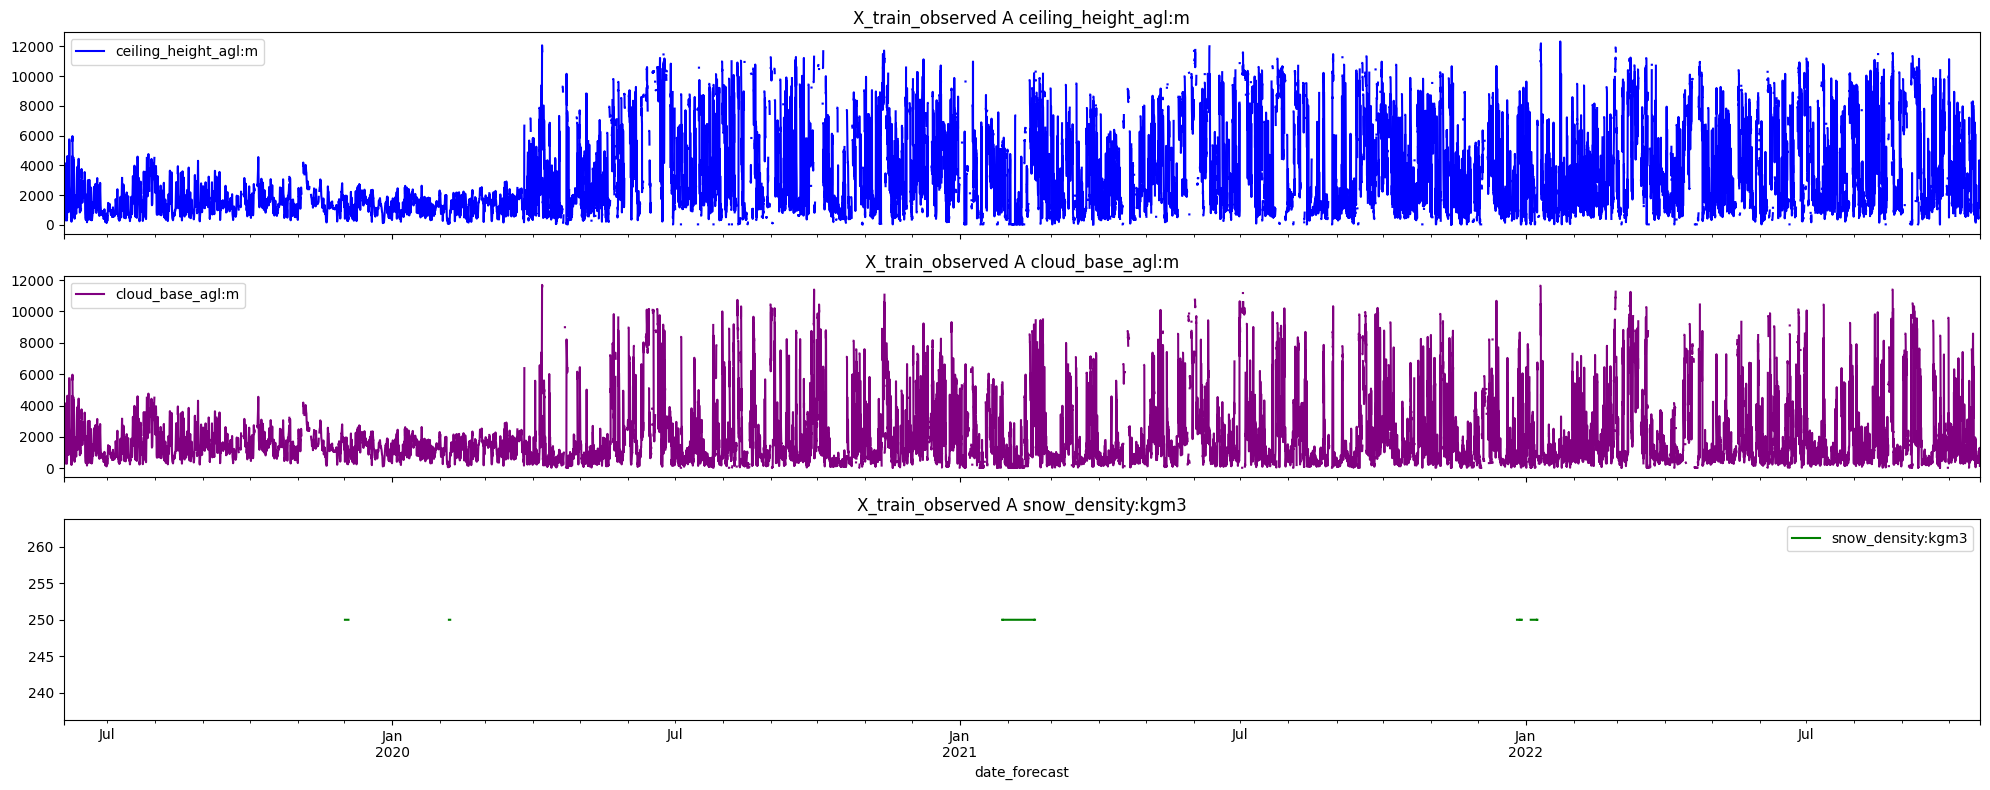

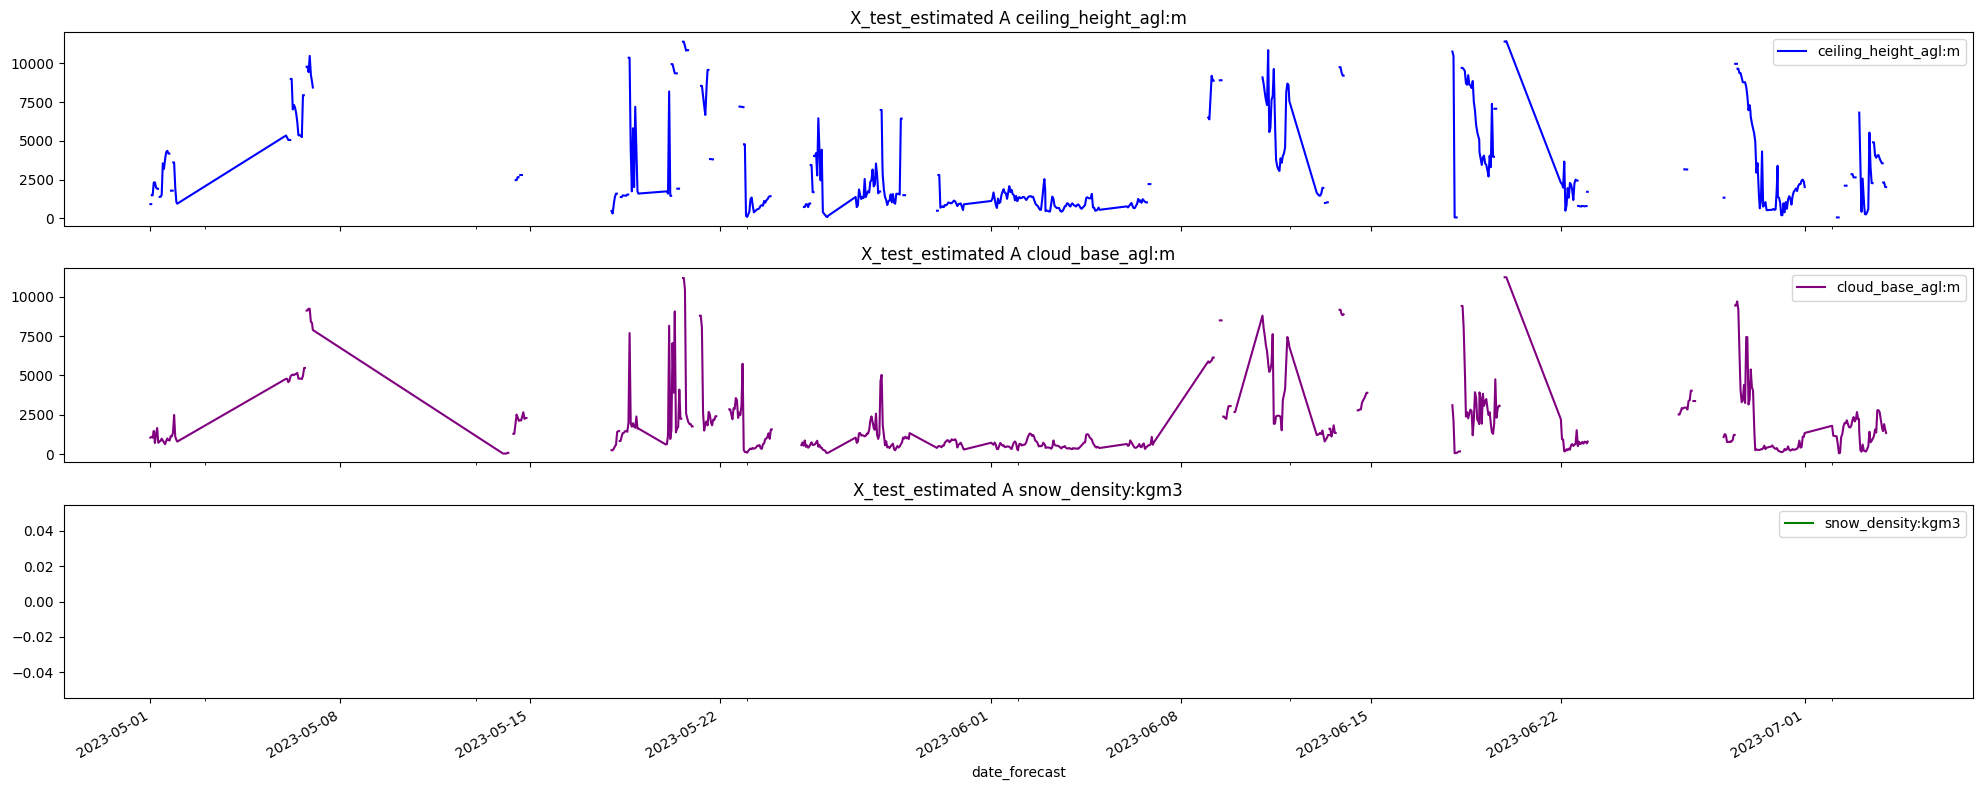

In [78]:
nan_feat = ['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3']

def feat_plot(df: pd.DataFrame, name: str, nan_feat: list):
    """
    This function is intended to plot the data for a given set.
    """
    plt.rcParams['figure.figsize'] = [20, 8]
    fig, axs = plt.subplots(3, 1, sharex=True)
    colors = ['blue', 'purple', 'green']  # Add more colors as needed

    for i, f in enumerate(nan_feat):
        df[['date_forecast', f]].set_index('date_forecast').plot(ax=axs[i], title=f'{name} {f}', color=colors[i])

    plt.tight_layout()


feat_plot(X_train_observed_a, 'X_train_observed A', nan_feat)
# feat_plot(X_train_observed_b, 'X_train_observed B', nan_feat)
# feat_plot(X_train_observed_c, 'X_train_observed C', nan_feat)

# feat_plot(X_train_estimated_a, 'X_train_estimated A', nan_feat)
# feat_plot(X_train_estimated_b, 'X_train_estimated B', nan_feat)
# feat_plot(X_train_estimated_c, 'X_train_estimated C', nan_feat)

feat_plot(X_test_estimated_a, 'X_test_estimated A', nan_feat)
# feat_plot(X_test_estimated_b, 'X_test_estimated B', nan_feat)
# feat_plot(X_test_estimated_c, 'X_test_estimated C', nan_feat)

### Plott an exam all the features 🫧
__*All the features are seen*__

To plott all the features the code can be uncomented. Resumed the features: elevation:m, fresh_snow_12h:cm, fresh_snow_1h:cm, fresh_snow_24h:cm, fresh_snow_3h:cm, fresh_snow_6h:cm, prob_rime:p, snow_density:kg/m³, snow_depth:cm, snow_drift:idx, snow_melt_10min:mm, wind_speed_w_1000hPa:m/s are constant for all the data sets. This means that they are not usefull for the model. __(((TEST THIS WITH THE MODELS)))__

In [79]:
# def file_to_df(file_path: list[str]):
#     df = pd.read_parquet(file_path)
#     return df

# def create_X_set(X_estimated, X_observed):
#     X_estimated = X_estimated.drop("date_calc", axis = 1)
#     X = pd.concat([X_observed, X_estimated], axis = 0, ignore_index=True)
#     return X

# def plot_X_sets(file_paths: list[str]):
#     buildings = ['A', 'B', 'C']
#     paths = []
    
#     for i, path in enumerate(file_paths):
#         # Retrieve data        
#         y = pd.read_parquet(path[0])
        
        
#         X_estimated = pd.read_parquet(path[1])
#         X_observed = pd.read_parquet(path[2])
#         X = create_X_set(X_estimated, X_observed)

#         X_pred = pd.read_parquet(path[3])

#         plot_features(X, buildings[i])
#         plot_features(X_pred, "Pred "+ buildings[i])  

# def plot_X_sets(file_paths: list[str]):
#     buildings = ['A', 'B', 'C']
#     paths = []
    
#     for i, path in enumerate(file_paths):
#         # Retrieve data        
#         y = pd.read_parquet(path[0])
        
        
#         X_estimated = pd.read_parquet(path[1])
#         X_observed = pd.read_parquet(path[2])
#         X = create_X_set(X_estimated, X_observed)

#         X_pred = pd.read_parquet(path[3])

#         plot_features(X, buildings[i])
#         plot_features(X_pred, "Pred "+ buildings[i])  
        
# def plot_features(X: pd.DataFrame, set: str):
#     X = X.copy()
#     # Extract necesarry values for feature generation.
#     measurements = list(X.columns.values)
#     measurements.remove("date_forecast")
#     try:
#         measurements.remove("date_calc")
#     except:
#         print("")

#     for measurement in measurements:
#         # Count NaN values
#         nan_count = X[measurement].isna().sum()
#         print("Number of NaN values in " + measurement + ":", nan_count)

#         # Removing NaN values. If there are missing values treat start and end points as beginning and end of a line. MIGHT BE BAD FOR THE TRAINING DATA DROP USELESSNESS!
#         X[measurement] = X[measurement].fillna(0)
    
#         X[measurement].plot()
#         plt.title("Location " + set + ": " +measurement)
#         plt.show()

# file_paths = [['A/train_targets.parquet', 'A/X_train_estimated.parquet', 'A/X_train_observed.parquet', 'A/X_test_estimated.parquet'],
#               ['B/train_targets.parquet', 'B/X_train_estimated.parquet', 'B/X_train_observed.parquet', 'B/X_test_estimated.parquet'],
#               ['C/train_targets.parquet', 'C/X_train_estimated.parquet', 'C/X_train_observed.parquet', 'C/X_test_estimated.parquet']]
# plot_X_sets(file_paths) 

## Feature Extracting 🪺  DENNE DELEN MÅ FLYTTES LENGRE OPP SAMMEN MED VARANCE OG K_BEST

We started by figuring out what features could be usefull for the machine learning models.

First we at the correlation between pv_measured and the other features. Importaint note her is that altho some of the is higly correlated doesn't nessesarly mean that they are usefull for the model. (This narrative was also strengtend throug ploting some of the features with high correlation)
A Postive correlation means that the compaired features a.re moving in the same direction, and a negative one means that they are moving in the opposite direction. Our first thouth was that the features with the highest correlation would be the most usefull, but then we tried feature selection instead. 



### Help functions for correlation 🫧

In [80]:
# Beregn kovarians for hver funksjon med utgangsvariabelen
def correlation_calc(train, obs, features_list):
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    train = train.fillna(0)
    obs = obs.fillna(0)

    correlations = {}
    for feature in features_list:
        covariance = obs[feature].corr(train['pv_measurement'])
        correlations[feature] = covariance

    # Opprett en liste med kovariansverdiene
    corr_data = []
    for feature, corl in correlations.items():
        corr_data.append([feature, corl])
    return correlations, corr_data

def see_corre_text(correlations):
    print('This is the correlation between each feature and the output variable: \n')
    corr_data = [[feature, correlation] for feature, correlation in correlations.items()]
    table = tabulate(corr_data, headers=['Feature', 'Correlation'], tablefmt='pipe')
    print(table)

def see_corre_bar(correlations):
    correlation_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation']) # Create df to store the correlations
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False) # Sort the DataFrame by correlation values

    # Create a bar plot to visualize the correlations
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Correlation', y='Feature', data=correlation_df, orient='h', hue='Feature', palette='viridis', legend=False)
    plt.title('Correlation between pv_measurement and Features in obs')
    plt.xlabel('Correlation')
    plt.ylabel('Feature')
    plt.show()

### The Correlation

In [81]:
# print(X_train_observed_a.columns.values)
cor_features = ['absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'ceiling_height_agl:m',
    'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'cloud_base_agl:m',
    'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J',
    'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
    'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
    'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
    'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
    'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2',
    'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_density:kgm3',
    'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
    'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
    't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
    'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms']

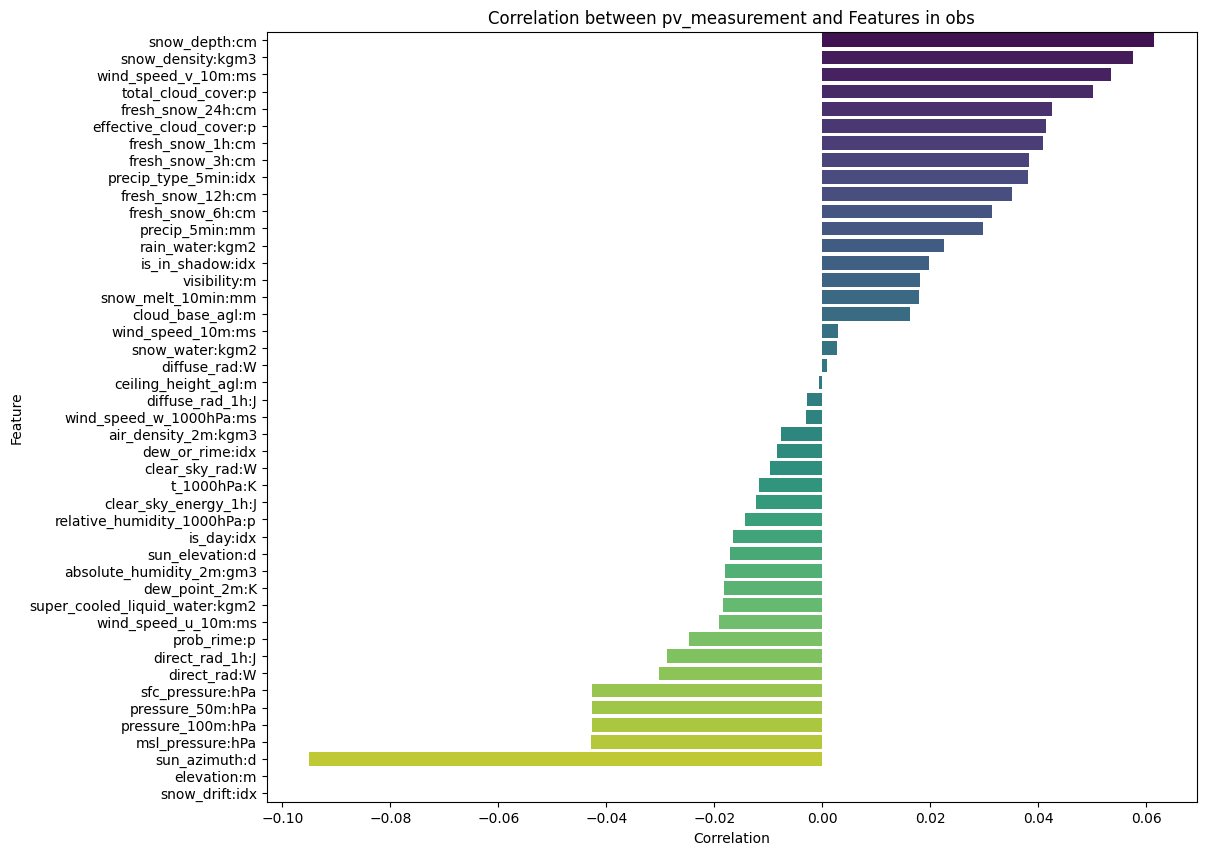

In [82]:
tr_a, obs_a = dat_proc.data_length_matching(train_a, X_train_observed_a)
correlations, corr_data = correlation_calc(train_a, obs_a, cor_features)
see_corre_bar(correlations)

### 1.13.1. Removing features with low variance -- VarianceThreshold
𓀀 𓀁 𓀂 𓀃 𓀄 𓀅 𓀆 𓀇 𓀈 𓀉 𓀊 𓀋 𓀌 𓀍 𓀎 𓀏 𓀐 𓀑 𓀒 𓀓 𓀔 𓀕 𓀖 𓀗 𓀘 𓀙 𓀚 𓀛 𓀜 𓀝

One of the test we did was also to preform pysical feature removing before putting them in the model. 

This is something :  __Check this__
Use some of scikit learn feature extraction functionality.

* VarianceThreshold it removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

* SelectKBest removes all but the k highest scoring features

(* Tree-based feature selection, * Try implementing this into: Pipeline (1.13.6.))

In [83]:
X_tr_est_a = X_train_estimated_a.drop(["date_calc"],axis=1)

def dt64_to_float(dt64):
     year = dt64.astype('M8[Y]')
     days = (dt64 - year).astype('timedelta64[D]')
     year_next = year + np.timedelta64(1, 'Y')
     days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
     dt_float = 1970 + year.astype(float) + days / (days_of_year)
     return dt_float

# If changing original variable -- only run once
X_total = pd.concat([X_tr_est_a, X_train_observed_a], axis = 0)
X_total = X_total.reset_index(drop=True)
X_total = X_total.dropna()
y, X = data_length_matching(train_a, X_total)
X['date_forecast'] = dt64_to_float(X['date_forecast'].to_numpy())

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

# Get the mask of selected features (True for selected, False for removed)
selected_features_mask = sel.get_support()

# Get the names of removed features
removed_features_try1 = [feature for feature, keep in zip(X.columns, selected_features_mask) if not keep]

# Print the names of removed features
print("Removed features:", removed_features_try1)

Removed features: ['air_density_2m:kgm3', 'dew_or_rime:idx', 'elevation:m', 'fresh_snow_1h:cm', 'precip_5min:mm', 'rain_water:kgm2', 'snow_density:kgm3', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'super_cooled_liquid_water:kgm2', 'wind_speed_w_1000hPa:ms']


### 1.13.2. Univariate feature selection -- SelectKBest

"This approach treats the NaNs as if they were actual zero values. Depending on the context of your data, this might not be the most appropriate treatment for missing values. If NaNs in your data have a specific meaning (like actual missing data or lack of observation), replacing them with zeros might not be accurate." - ChatGPT

#### With all the features (Except the three features) with NaN 𓀀 𓀁 𓀂 𓀃 𓀄 𓀅 𓀆 𓀇 𓀈 𓀉 𓀊 𓀋 𓀌 𓀍 𓀎 𓀏 𓀐 𓀑 𓀒 𓀓 𓀔 𓀕 𓀖 𓀗 𓀘 𓀙 𓀚 𓀛 𓀜 𓀝

In [84]:
X = X.drop(['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'] , axis=1)
y = y['pv_measurement'].ravel()

X_new_all = SelectKBest(f_regression, k=5).fit_transform(X, y)

# Fit the SelectKBest method and transform the data
selector = SelectKBest(f_regression, k = 5)
X_new_all = selector.fit_transform(X, y)

# Get the mask of selected features (True for selected, False for removed)
selected_features_mask = selector.get_support()

# Get the names of removed features
removed_features_try2 = [feature for feature, keep in zip(X.columns, ~selected_features_mask)]

# Print the names of removed features
print("Removed features:", removed_features_try2)

Removed features: ['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms']


#### With the removed features 𓀀 𓀁 𓀂 𓀃 𓀄 𓀅 𓀆 𓀇 𓀈 𓀉 𓀊 𓀋 𓀌 𓀍 𓀎 𓀏 𓀐 𓀑 𓀒 𓀓 𓀔 𓀕 𓀖 𓀗 𓀘 𓀙 𓀚 𓀛 𓀜 𓀝

In [85]:
# Create a SelectKBest instance with the f_regression method and k=5 (to select 5 best features)
selector = SelectKBest(f_regression, k=5)

# Fit the SelectKBest instance on your data (X and y) to select the best features
X_new = selector.fit_transform(X, y)

# Get the mask of selected features (True for selected, False for removed)
selected_features_mask = selector.get_support()

# Get the names of removed features (features not selected)
removed_features_try3 = [feature for feature, keep in zip(X.columns, ~selected_features_mask)]

# Print the names of removed features
print("Removed features:", removed_features_try3)


Removed features: ['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms']


In [86]:
# Convert the lists to sets for easier comparison
set1 = set(removed_features_try1)
set2 = set(removed_features_try2)
set3 = set(removed_features_try3)

# Find the differences between lists
diff_set1_2 = set1.symmetric_difference(set2)
diff_set1_3 = set1.symmetric_difference(set3)
diff_set2_3 = set2.symmetric_difference(set3)

# Print the differences and indicate which list they belong to
print("Features in try1 and not in try2:", diff_set1_2, "in try1")
print("Features in try1 and not in try3:", diff_set1_3, "in try1")
print("Features in try2 and not in try3:", diff_set2_3, "in try2")


Features in try1 and not in try2: {'sun_azimuth:d', 't_1000hPa:K', 'dew_point_2m:K', 'wind_speed_10m:ms', 'direct_rad:W', 'msl_pressure:hPa', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'fresh_snow_3h:cm', 'total_cloud_cover:p', 'fresh_snow_12h:cm', 'clear_sky_rad:W', 'wind_speed_v_10m:ms', 'pressure_50m:hPa', 'snow_depth:cm', 'is_in_shadow:idx', 'effective_cloud_cover:p', 'absolute_humidity_2m:gm3', 'direct_rad_1h:J', 'wind_speed_u_10m:ms', 'snow_density:kgm3', 'sun_elevation:d', 'date_forecast', 'diffuse_rad:W', 'precip_type_5min:idx', 'prob_rime:p', 'diffuse_rad_1h:J', 'is_day:idx', 'fresh_snow_24h:cm', 'clear_sky_energy_1h:J', 'fresh_snow_6h:cm', 'visibility:m', 'pressure_100m:hPa'} in try1
Features in try1 and not in try3: {'sun_azimuth:d', 't_1000hPa:K', 'dew_point_2m:K', 'wind_speed_10m:ms', 'direct_rad:W', 'msl_pressure:hPa', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'fresh_snow_3h:cm', 'total_cloud_cover:p', 'fresh_snow_12h:cm', 'clear_sky_rad:W', 'wind_speed_v

#### ^^ Coment on the result over